<a href="https://colab.research.google.com/github/MhdRaihanB/ML_Tasks_MhdRaihanB/blob/main/UTS/Tugas%20UTS%20Credit%20Score_Random%20Forest_Muhammad%20Raihan%20B_1103213077.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Raihan Butar-Butar

NIM : 1103213077

Dataset : train.csv and test.csv

Tugas UTS Credit Score Random Forest

# MOUNT GOOGLE DRIVE

In [100]:
from google.colab import drive

# Menghubungkan dengan Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel

# LOAD DATASET

In [102]:
import pandas as pd

# Baca dataset
df_train = pd.read_csv("/content/drive/My Drive/Dataset/UTS/train.csv")
df_test = pd.read_csv("/content/drive/My Drive/Dataset/UTS/test.csv")

<ipython-input-102-cfd8669c899b>:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("/content/drive/My Drive/Dataset/UTS/train.csv")


In [103]:
print('Data Train')
df_train.head(10)

Data Train


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [104]:
print('Data Test')
df_test.head(10)

Data Test


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,NaN,1,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.50365354404653,Low_spent_Medium_value_payments,854.2260270022115
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


# PREPROCESSING

In [105]:
df_train.info()
print()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [106]:
drop_col = ['ID', 'Customer_ID', 'Name', 'SSN', 'Credit_History_Age', 'Type_of_Loan']
df_train.drop(columns=drop_col, inplace=True)
df_test.drop(columns=drop_col, inplace=True)

In [107]:
# Change null values if numeric change to 0, else change to -
def handle_null_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column].fillna('-', inplace=True)
        else:
            df[column].fillna(0, inplace=True)

handle_null_values(df_train)
handle_null_values(df_test)

In [108]:
# Remove _
df_train = df_train.applymap(lambda x: x.replace('_', ' ') if isinstance(x, str) else x)
df_test = df_test.applymap(lambda x: x.replace('_', ' ') if isinstance(x, str) else x)


In [109]:
# Remove negative age
character_to_remove = '-'
df_train = df_train[~df_train['Age'].str.contains(character_to_remove)]

In [110]:
df_test.describe()


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3554.870928,16.838260,22.921480,68.772640,21.052640,29.457540,32.279581,1491.304305
std,3285.349285,116.396848,129.314804,451.602363,14.860397,194.981674,5.106238,8595.647887
min,0.000000,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1183.200833,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,2615.258333,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5338.967500,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [111]:
df_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,99114.000000,99114.000000,99114.000000,99114.000000,99114.000000,99114.000000,99114.000000,99114.000000
mean,3565.978277,17.177432,22.470055,72.350717,21.064925,27.249188,32.284446,1401.561497
std,3295.115513,117.845592,129.012158,466.152398,14.854316,191.497898,5.116639,8301.531690
min,0.000000,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1184.399271,3.000000,4.000000,8.000000,10.000000,3.000000,28.052221,30.338204
50%,2625.371667,6.000000,5.000000,13.000000,18.000000,5.000000,32.305569,69.272824
75%,5373.653333,7.000000,7.000000,20.000000,28.000000,9.000000,36.494811,161.340704
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


# FEATURE ENGINEERING

In [112]:
# Categorical Encoding
categorical = ['Month',"Occupation","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour","Credit_Score"]

label_encoder = LabelEncoder()
for x in categorical:
    df_train[x] = label_encoder.fit_transform(df_train[x])
for x in categorical[:-1]:
    df_test[x] = label_encoder.fit_transform(df_test[x])

# Filter out negative values in numeric columns
df_test = df_test.apply(pd.to_numeric,errors='coerce')
df_test = df_test.applymap(lambda x: x if x >= 0 else None)
df_test.dropna(axis=0,inplace=True)

df_train = df_train.apply(pd.to_numeric,errors='coerce')
df_train = df_train.applymap(lambda x: x if x >= 0 else None)
df_train.dropna(axis=0,inplace=True)

In [113]:
# Calculate quartiles for each feature
quartiles1 = df_test.quantile([0.25, 0.75])
quartiles2 = df_train.quantile([0.25, 0.75])

# Calculate IQR (Interquartile Range) for each feature
IQR1 = quartiles1.loc[0.75] - quartiles1.loc[0.25]
IQR2 = quartiles2.loc[0.75] - quartiles2.loc[0.25]

# Define lower and upper bounds for each feature
lower_bound1 = (quartiles1.loc[0.25] - 1.5 * IQR1).to_dict()
upper_bound1 = (quartiles1.loc[0.75] + 1.5 * IQR1).to_dict()
lower_bound2 = (quartiles2.loc[0.25] - 1.5 * IQR2).to_dict()
upper_bound2 = (quartiles2.loc[0.75] + 1.5 * IQR2).to_dict()

In [114]:
# Filter out data points outside the bounds for each feature
filtered_data1 = df_test.copy()
for feature in df_test.columns:
    lower_bound_value1 = lower_bound1[feature]
    upper_bound_value1 = upper_bound1[feature]
    filtered_data1 = filtered_data1[(filtered_data1[feature] >= lower_bound_value1) & (filtered_data1[feature] <= upper_bound_value1)]
df_test = filtered_data1

filtered_data2 = df_train.copy()
for feature in df_train.columns:
    lower_bound_value2 = lower_bound2[feature]
    upper_bound_value2 = upper_bound2[feature]
    filtered_data2 = filtered_data2[(filtered_data2[feature] >= lower_bound_value2) & (filtered_data2[feature] <= upper_bound_value2)]
df_train = filtered_data2

# MODELING

In [115]:
# Machine Learning Models : Random Forest

# Feature selection
X_train = df_train.drop('Credit_Score',axis=1)
y_train = df_train['Credit_Score']

X_test = df_test

# Split train data into training data and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Create Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_valid_rf = rf_model.predict(X_valid)

# EVALUATE DATA

<Axes: xlabel='Credit_Score'>

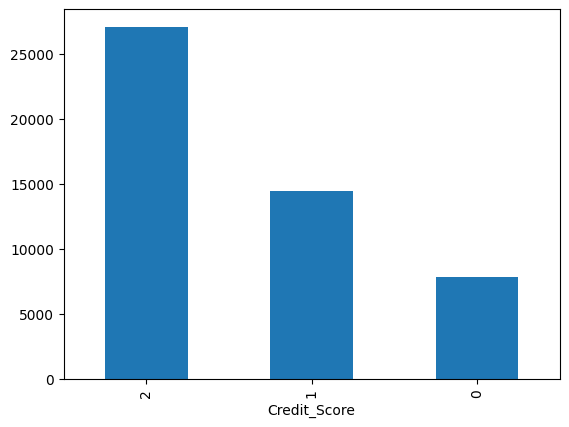

In [116]:
# Show Plot Bar
df_train['Credit_Score'].value_counts().plot(kind='bar')

In [117]:
# Show frequency of each value
df_train['Credit_Score'].value_counts()

Credit_Score
2    27105
1    14439
0     7838
Name: count, dtype: int64

In [118]:
# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred_valid_rf)
print("Accuracy:", accuracy)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred_valid_rf)
print("Accuracy:", accuracy)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_valid, y_pred_valid_rf)
print("Mean Squared Error (MSE):", mse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_valid, y_pred_valid_rf)
print("Mean Absolute Error (MAE):", mae)

Accuracy: 0.7918607005466693
Accuracy: 0.7918607005466693
Mean Squared Error (MSE): 0.4468515893905649
Mean Absolute Error (MAE): 0.28771006276574207
